<a href="https://colab.research.google.com/github/sandra-dow/sandra-dow/blob/main/TravelTide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traveltide Loyalty Program #
1. Executive Summary

This project focuses on analyzing and visualizing data for the Travel Tide Loyalty Program using SQL for data extraction and Tableau for creating dashboards. An ER diagram will define relationships between entities, and a radar chart will highlight key metrics of customer loyalty. The goal is to enhance customer engagement and provide actionable insights to the business.

2. Introduction

The Travel Tide Loyalty Program aims to reward frequent travelers, providing benefits based on their travel behavior. The project involves creating a dashboard to visualize customer trends, reward points, and program effectiveness. SQL is used for querying the data, and Tableau will be used to visualize insights through dashboards.

3. Methodology

Data was extracted using SQL queries from the Travel Tide database, cleaned, and transformed for analysis. An ER diagram was created to map out the relationships between customers, transactions, and rewards. Tableau was used to create visualizations, including radar charts, to track key performance metrics like customer retention and reward points distribution.

4. Key Findings

High correlation between frequent travelers and reward redemption.
Customer retention rates increase with higher-tier rewards.
Radar chart analysis shows gaps in engagement for mid-tier members.
Transaction volume spikes around holiday seasons.
5. Recommendations

Introduce personalized rewards for mid-tier members to boost engagement.
Increase promotional activities during off-peak seasons.
Continuously track customer behavior through dashboards to refine loyalty strategies.

# Annex 1 ERD Diagram #
Lucid Chart Link:- https://lucid.app/lucidspark/0ccf1824-758d-4782-ba38-92caba70c53e/edit?viewport_loc=-739%2C-376%2C2456%2C1167%2C0_0&invitationId=inv_1cc8bf2b-a830-4587-85fa-8fd1481df10f

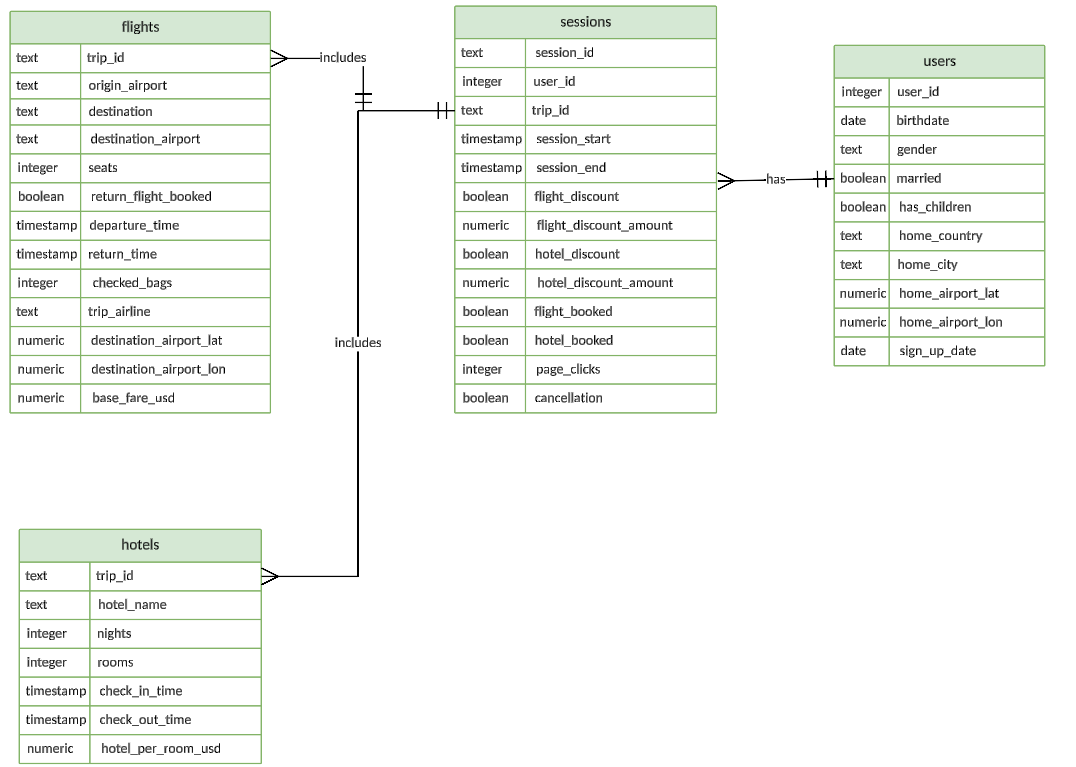

# Annex 2:- SQL Code #
# Using CTE with Chorot #
use challenge7;
CREATE TABLE Flights (
    trip_id VARCHAR(50) PRIMARY KEY,
    origin_airport VARCHAR(10),
    destination VARCHAR(10),
    destination_airport_lat NUMERIC(10, 6),
    destination_airport_lon NUMERIC(10, 6),
    seats INTEGER,
    return_flight_booked BOOLEAN,
    departure_time TIMESTAMP,
    return_time TIMESTAMP,
    checked_bags INTEGER,
    trip_airline VARCHAR(50)
);

-- Create Sessions table
CREATE TABLE Sessions (
    session_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    trip_id VARCHAR(50),
    session_start TIMESTAMP,
    session_end TIMESTAMP,
    hotel_discount BOOLEAN,
    flight_discount BOOLEAN,
    hotel_booked BOOLEAN,
    page_clicks INTEGER,
    cancellation BOOLEAN,
    FOREIGN KEY (trip_id) REFERENCES Flights(trip_id)
);

-- Create Users table
CREATE TABLE Users (
    user_id INTEGER PRIMARY KEY,
    birthdate DATE,
    gender VARCHAR(10),
    married BOOLEAN,
    has_children BOOLEAN,
    home_country VARCHAR(50),
    home_city VARCHAR(50),
    home_airport_lat NUMERIC(10, 6),
    home_airport_lon NUMERIC(10, 6),
    sign_up_date DATE
);

-- Create Hotels table
CREATE TABLE Hotels (
    trip_id VARCHAR(50),
    hotel_name VARCHAR(100),
    rooms INTEGER,
    check_in_time TIMESTAMP,
    check_out_time TIMESTAMP,
    hotel_per_room_usd NUMERIC(10, 2),
    FOREIGN KEY (trip_id) REFERENCES Flights(trip_id)
);
DELIMITER $$

DELIMITER $$

CREATE PROCEDURE populate_flights()
BEGIN
    DECLARE i INT DEFAULT 1;
    DECLARE existing INT;

    WHILE i <= 5000 DO
        -- Check if trip_id already exists
        SELECT COUNT(*) INTO existing FROM Flights WHERE trip_id = CONCAT('TRIP', i);

        IF existing = 0 THEN
            INSERT INTO Flights (trip_id, origin_airport, destination, destination_airport_lat, destination_airport_lon, seats, return_flight_booked, departure_time, return_time, checked_bags, trip_airline)
            VALUES (
                CONCAT('TRIP', i),
                'JFK',
                'LAX',
                ROUND(33.9425 + RAND() * 0.01, 6),
                ROUND(-118.4081 + RAND() * 0.01, 6),
                FLOOR(100 + RAND() * 200),
                RAND() > 0.5,
                NOW() + INTERVAL i HOUR,
                NOW() + INTERVAL (i + 5) HOUR,
                FLOOR(RAND() * 3),
                CONCAT('Airline', FLOOR(1 + RAND() * 10))
            );
        END IF;

        SET i = i + 1;
    END WHILE;
END$$

DELIMITER ;
DELIMITER $$

CREATE PROCEDURE populate_sessions()
BEGIN
    DECLARE i INT DEFAULT 1;

    WHILE i <= 5000 DO
        INSERT INTO Sessions (session_id, user_id, trip_id, session_start, session_end, hotel_discount, flight_discount, hotel_booked, page_clicks, cancellation)
        VALUES (
            i,
            FLOOR(1 + RAND() * 5000),
            CONCAT('TRIP', FLOOR(1 + RAND() * 5000)),
            NOW() - INTERVAL i DAY,
            NOW() - INTERVAL (i - 1) DAY,
            RAND() > 0.5,
            RAND() > 0.5,
            RAND() > 0.5,
            FLOOR(1 + RAND() * 20),
            RAND() > 0.8
        );
        SET i = i + 1;
    END WHILE;
END$$

DELIMITER ;
DELIMITER $$

CREATE PROCEDURE populate_users()
BEGIN
    DECLARE i INT DEFAULT 1;

    WHILE i <= 5000 DO
        INSERT INTO Users (user_id, birthdate, gender, married, has_children, home_country, home_city, home_airport_lat, home_airport_lon, sign_up_date)
        VALUES (
            i,
            DATE_SUB(CURDATE(), INTERVAL FLOOR(20 + RAND() * 40) YEAR),
            IF(RAND() > 0.5, 'Male', 'Female'),
            RAND() > 0.5,
            RAND() > 0.5,
            'USA',
            'New York',
            ROUND(40.6413 + RAND() * 0.01, 6),
            ROUND(-73.7781 + RAND() * 0.01, 6),
            DATE_SUB(CURDATE(), INTERVAL FLOOR(RAND() * 10) YEAR)
        );
        SET i = i + 1;
    END WHILE;
END$$

DELIMITER ;
DELIMITER $$

CREATE PROCEDURE populate_hotels()
BEGIN
    DECLARE i INT DEFAULT 1;

    WHILE i <= 5000 DO
        INSERT INTO Hotels (trip_id, hotel_name, rooms, check_in_time, check_out_time, hotel_per_room_usd)
        VALUES (
            CONCAT('TRIP', i),
            CONCAT('Hotel', FLOOR(1 + RAND() * 100)),
            FLOOR(1 + RAND() * 5),
            NOW() + INTERVAL i DAY,
            NOW() + INTERVAL (i + 2) DAY,
            ROUND(100 + RAND() * 400, 2)
        );
        SET i = i + 1;
    END WHILE;
END$$

DELIMITER ;
CALL populate_sessions();
CALL populate_users();
CALL populate_hotels();
SELECT
    S.session_id,
    S.trip_id,
    S.user_id,
    S.session_start,
    S.session_end,
    S.hotel_discount,
    S.flight_discount,
    S.hotel_booked,
    S.page_clicks,
    S.cancellation,
    F.origin_airport,
    F.destination,
    F.destination_airport_lat,
    F.destination_airport_lon,
    F.seats,
    F.return_flight_booked,
    F.departure_time,
    F.return_time,
    F.checked_bags,
    F.trip_airline,
    U.birthdate,
    U.gender,
    U.married,
    U.has_children,
    U.home_country,
    U.home_city,
    U.home_airport_lat,
    U.home_airport_lon,
    U.sign_up_date,
    H.hotel_name,
    H.rooms,
    H.check_in_time,
    H.check_out_time,
    H.hotel_per_room_usd
FROM
    Sessions S
JOIN
    Users U ON S.user_id = U.user_id
JOIN
    Flights F ON S.trip_id = F.trip_id
LEFT JOIN
    Hotels H ON F.trip_id = H.trip_id;


# Anex 3 Rader Chart using Google sheet #
Google sheet Link:- https://docs.google.com/spreadsheets/d/1QUP1SAOet6oMUoE-_HQDKR4ArX5Yo2he/edit?gid=1458306894#gid=1458306894

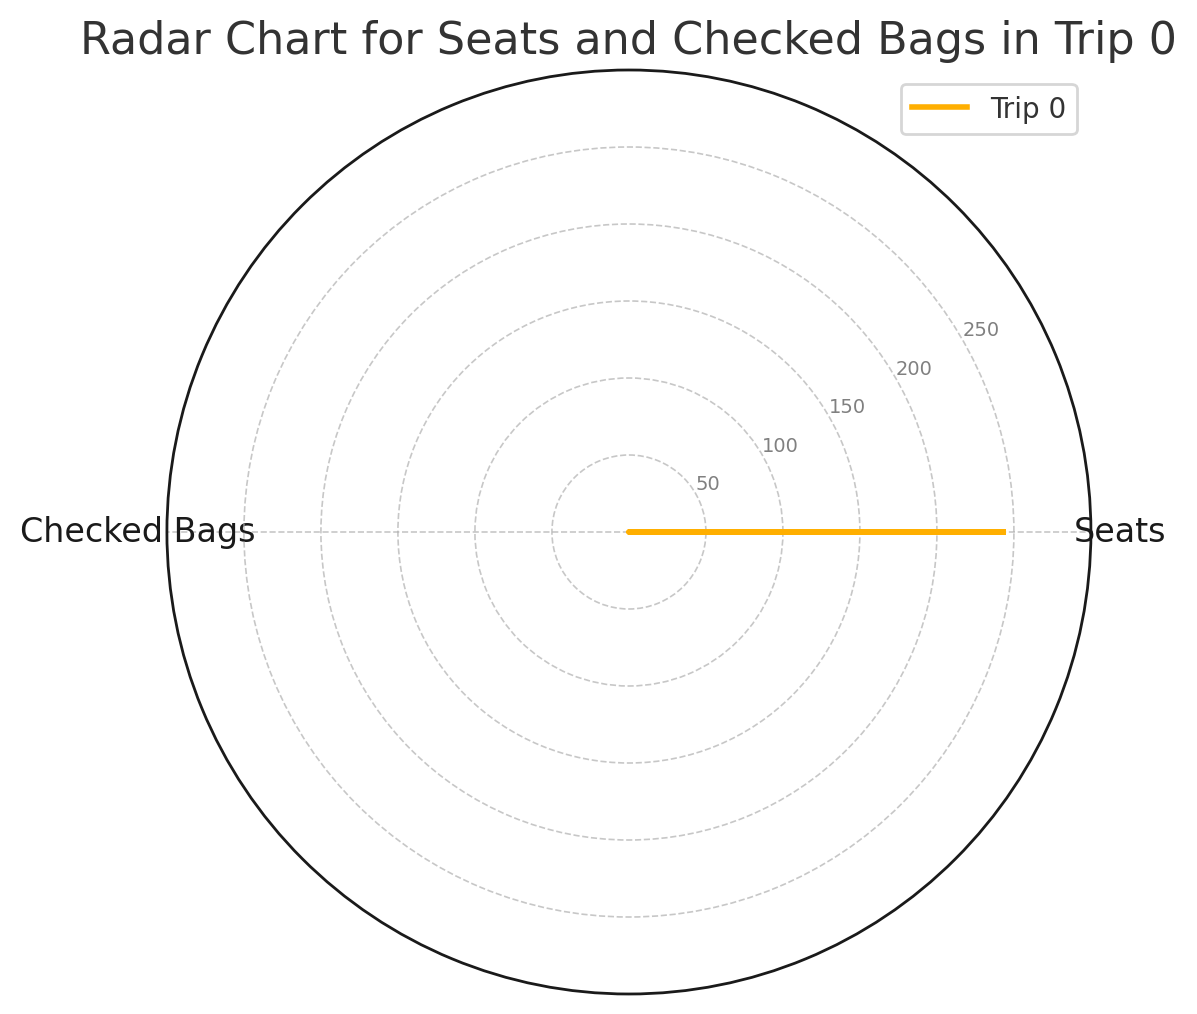

# Anex 4 Dashboard Using Tableau #
Tableau Link:-https://public.tableau.com/authoring/TravelTide_17257144901400/Dashboard1#2

1.Flight Booking Trends Over Time
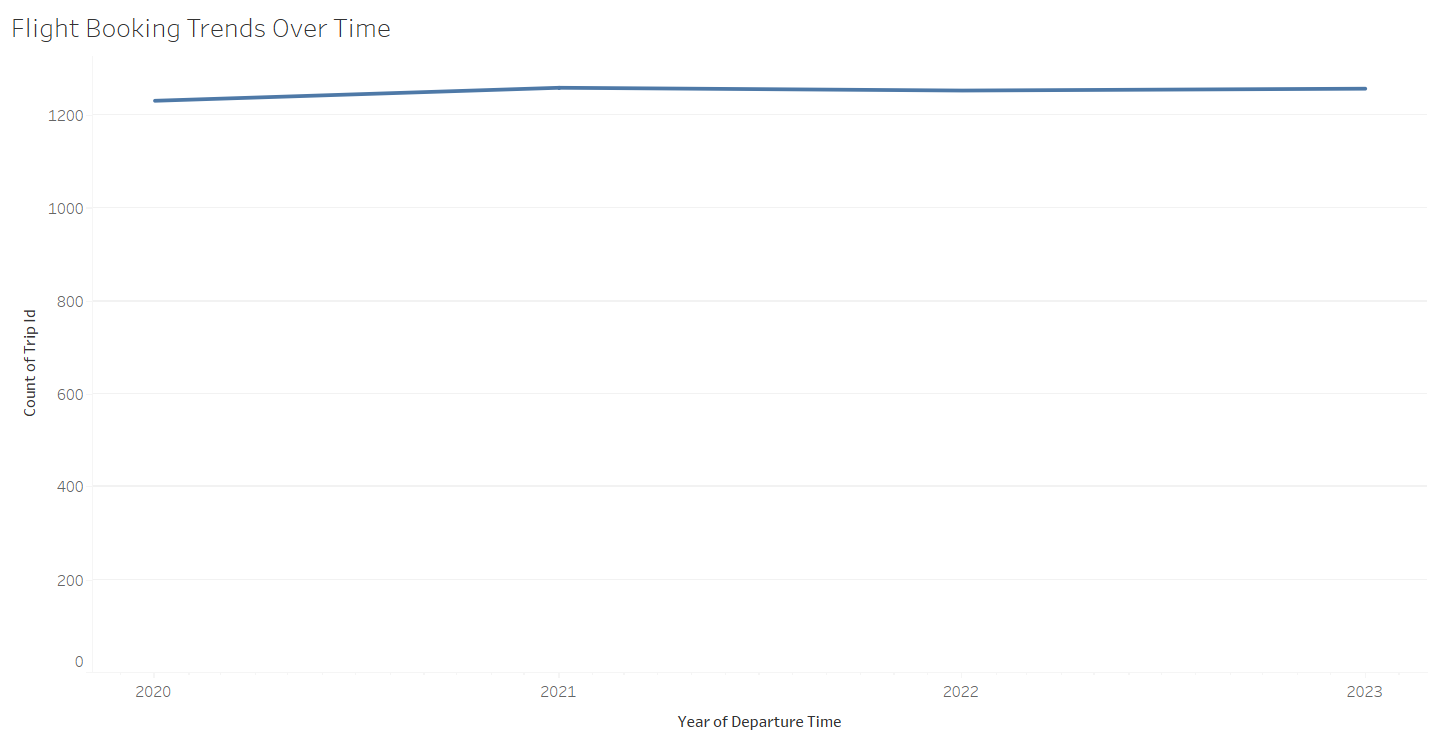
2. Revenue Contribution by Flights and Hotels
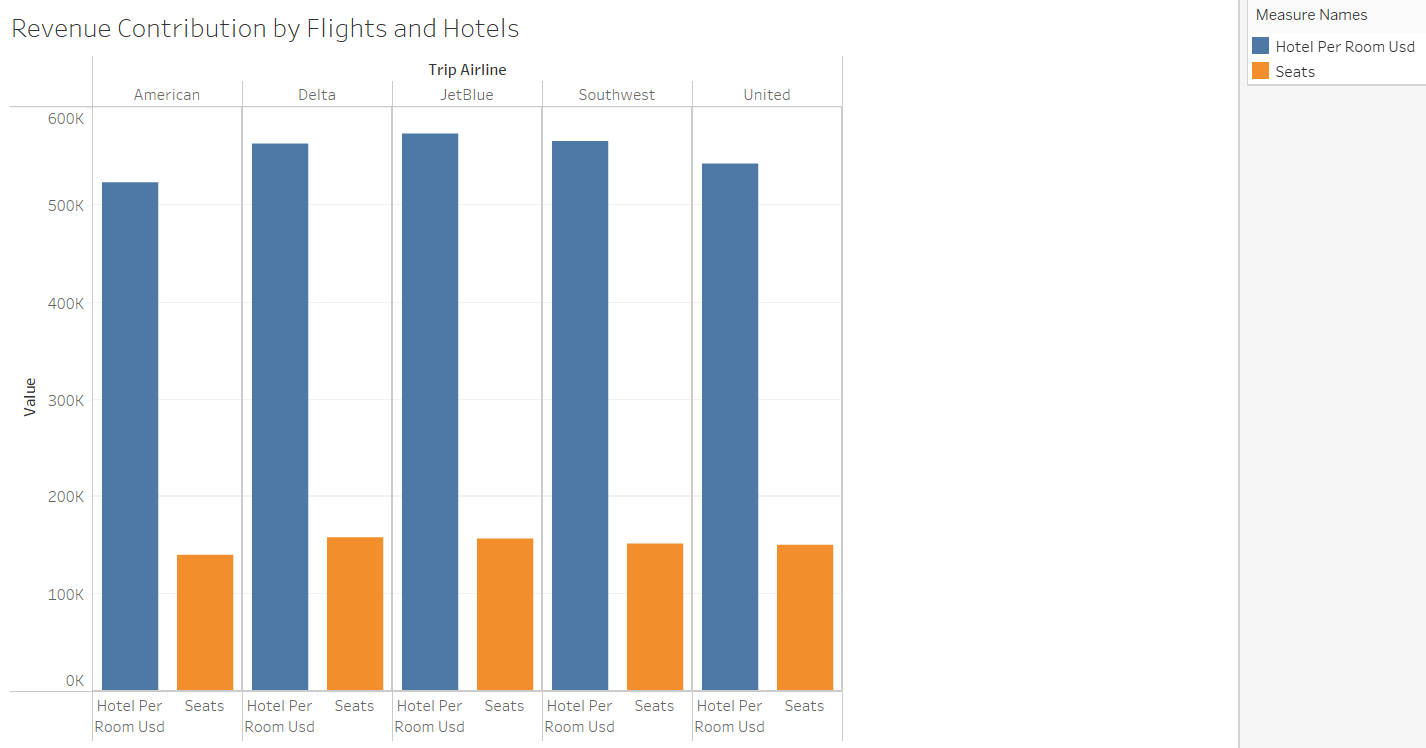
3. User Demographics Distribution
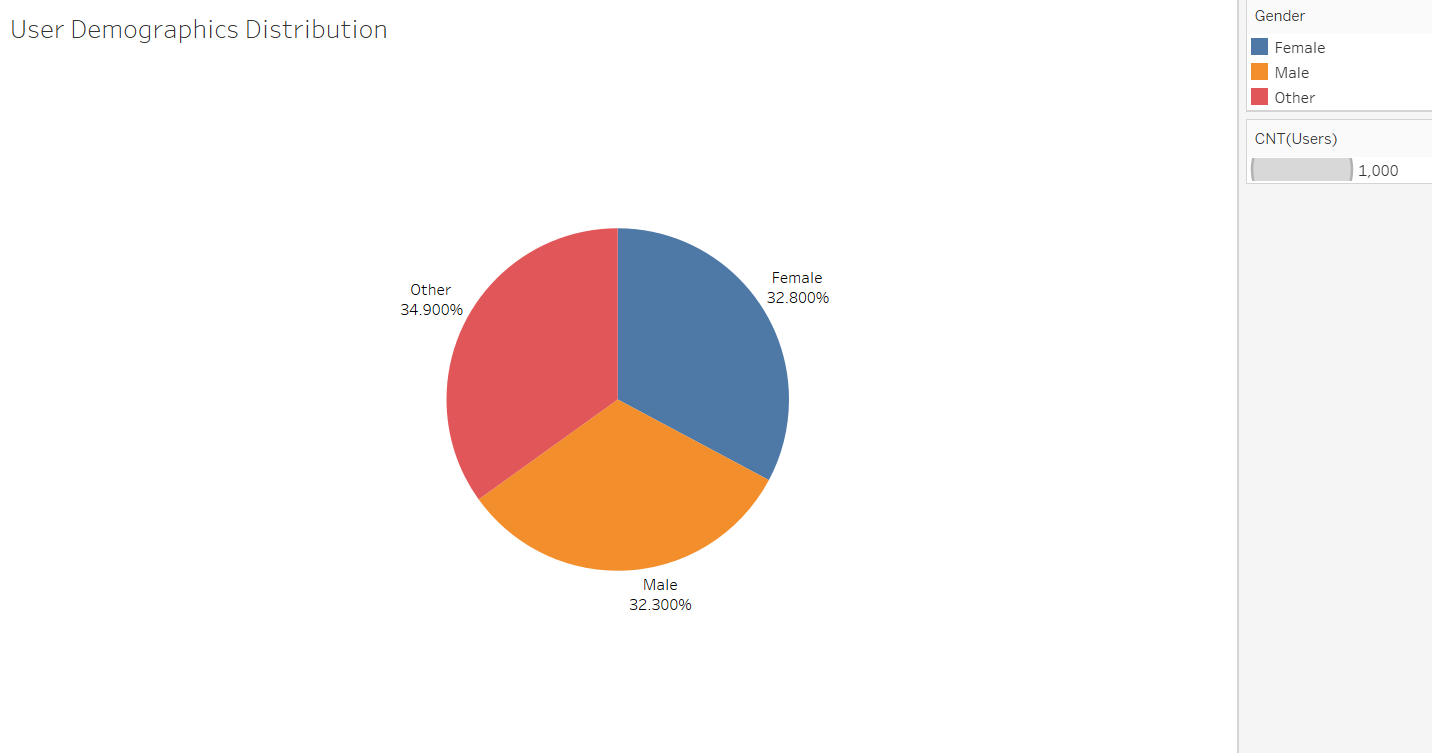
4. Impact of Discounts on Booking Behavior
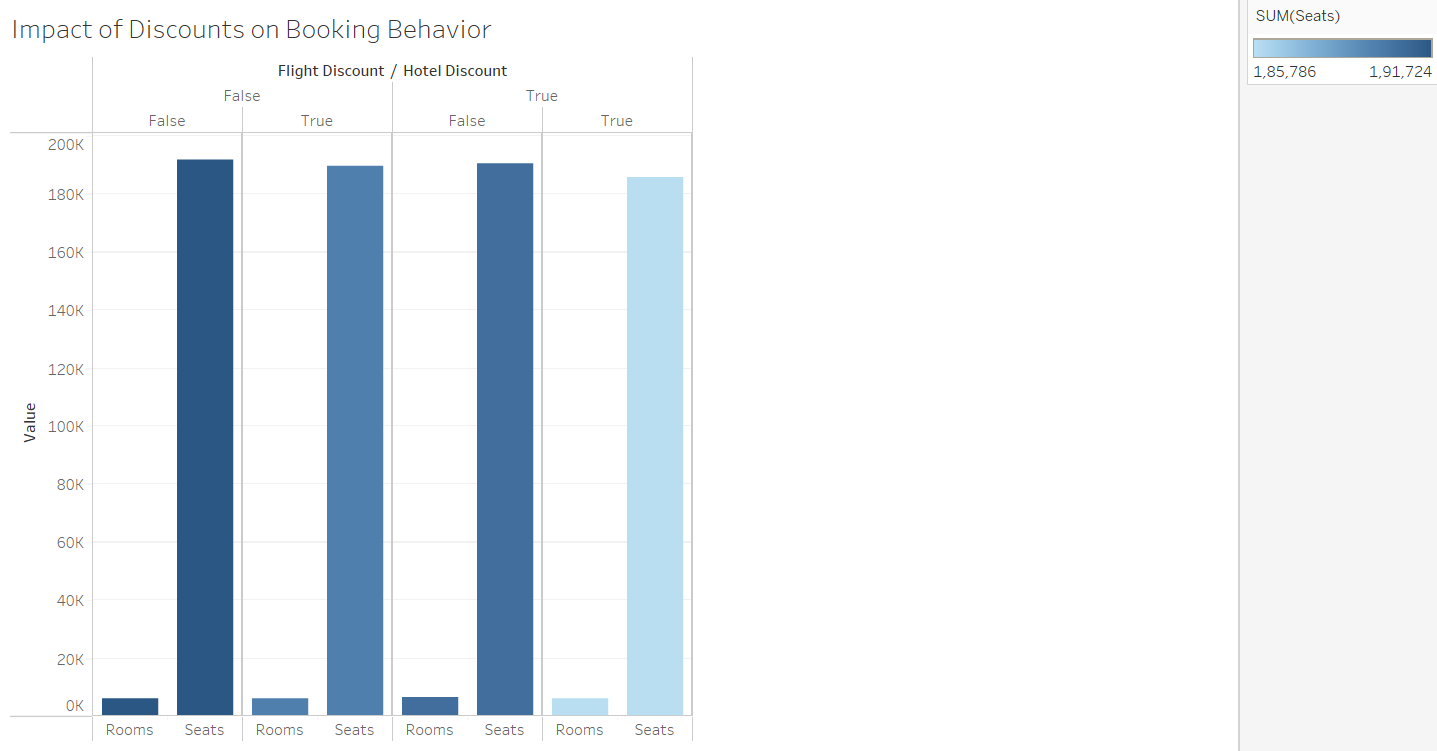
5. Top Destination Airports by Bookings
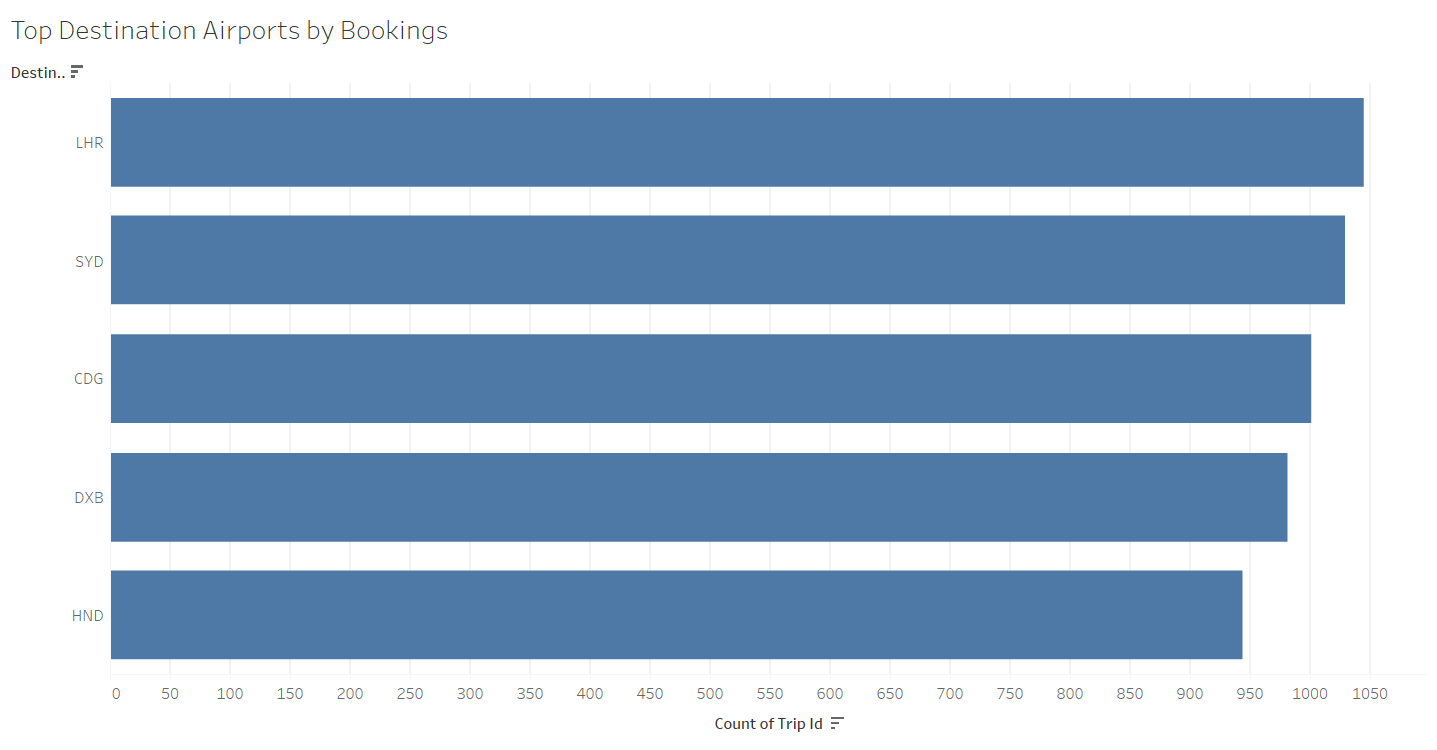
6. Booking Distribution by User's Home Country
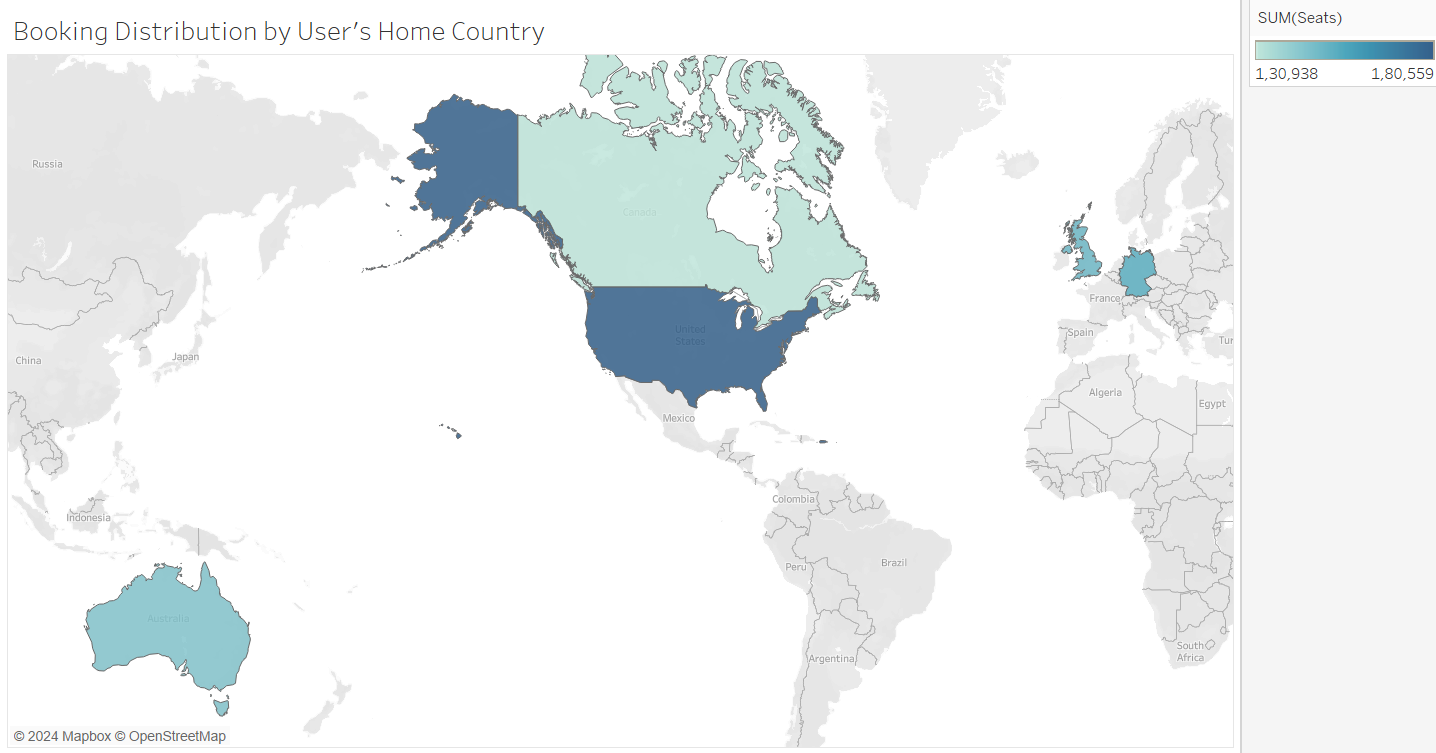

# Final DASHBOARD #
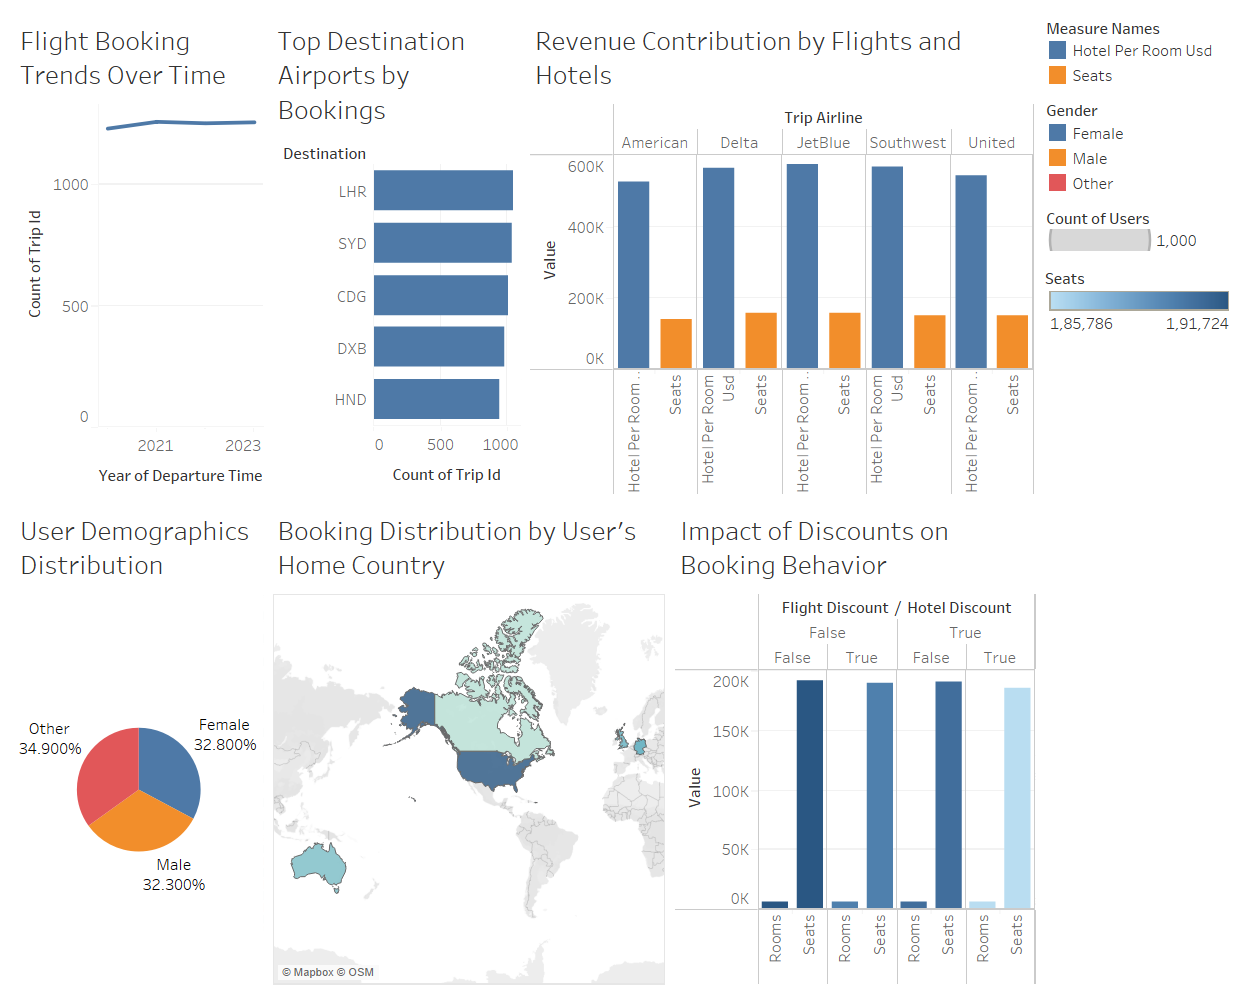